In [6]:
import itertools
from scipy import misc
import scipy.misc
import imageio
from scipy.sparse.dok import dok_matrix
from scipy.sparse.csgraph import dijkstra

In [8]:

# Load the image from disk as a numpy ndarray
original_img = imageio.imread('bY8cN.png')


In [9]:
# Create a flat color image for graph building:
img = original_img[:, :, 0] + original_img[:, :, 1] + original_img[:, :, 2]

In [14]:
# Defines a translation from 2 coordinates to a single number
def to_index(y, x):
    return y * img.shape[1] + x

In [23]:

# Defines a reversed translation from index to 2 coordinates
def to_coordinates(index):
    return index // img.shape[1], index % img.shape[1]

In [24]:
# A sparse adjacency matrix.
# Two pixels are adjacent in the graph if both are painted.
adjacency = dok_matrix((img.shape[0] * img.shape[1],
                        img.shape[0] * img.shape[1]), dtype=bool)

In [25]:
# The following lines fills the adjacency matrix by
directions = list(itertools.product([0, 1, -1], [0, 1, -1]))
for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        if not img[i, j]:
            continue

        for y_diff, x_diff in directions:
            if img[i + y_diff, j + x_diff]:
                adjacency[to_index(i, j),
                          to_index(i + y_diff, j + x_diff)] = True

In [26]:
# We chose two arbitrary points, which we know are connected
source = to_index(14, 47)
target = to_index(151, 122)

In [27]:
# Compute the shortest path between the source and all other points in the image
_, predecessors = dijkstra(adjacency, directed=False, indices=[source],
                           unweighted=True, return_predecessors=True)

In [28]:
# Constructs the path between source and target
pixel_index = target
pixels_path = []
while pixel_index != source:
    pixels_path.append(pixel_index)
    pixel_index = predecessors[0, pixel_index]

In [29]:
# The following code is just for debugging and it visualizes the chosen path
import matplotlib.pyplot as plt

In [30]:
for pixel_index in pixels_path:
    i, j = to_coordinates(pixel_index)
    original_img[i, j, 0] = original_img[i, j, 1] = 0

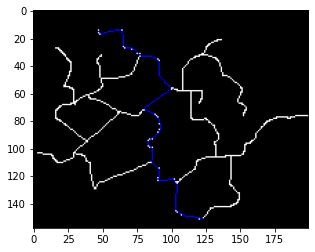

In [31]:
plt.imshow(original_img)
plt.show()